#### Lib Import

In [104]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import urllib
import functions as f

In [105]:
url = "https://pastebin.com/raw/j30qh61S"
#resp = urllib.request.urlopen(url_data)
data1 = pd.read_csv(r'./dataset/Sochi10-11.csv', header=0, sep =',')

data1 = data1.loc[data1['temperatureAvg'] > 1]
data1 = data1.loc[data1['id'] >= 1]


In [106]:
tsmax = data1['ts_ir'].max()
tsmin = data1['ts_ir'].min()
diff_ts = tsmax - tsmin
target_time = diff_ts / 60 * 54.3 + tsmin

In [114]:
query =  data1.loc[((target_time - 8000) <= data1['ts_ir']) & (data1['ts_ir']  <= (target_time + 8000))]


In [115]:
unique = data1['id'].unique()
indexes_good = []
for id in unique:
    if data1.loc[data1['id'] == id]['temperatureAvg'].mean() > 2500:
        indexes_good += [id]
loc_query = data1['id'].apply(lambda x: x in indexes_good)
data1 = data1.loc[loc_query]


In [116]:
full_set_avg = f.mean_list(data1)
target_set_avg = f.mean_list(query)


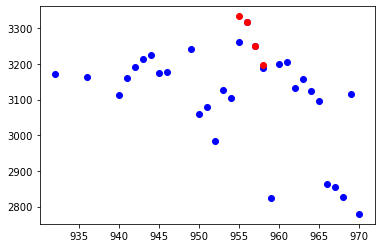

In [117]:
plt.scatter(data1['id'].unique(),full_set_avg, color = 'blue')
plt.scatter(query['id'].unique(),target_set_avg, color = 'red')
plt.show()

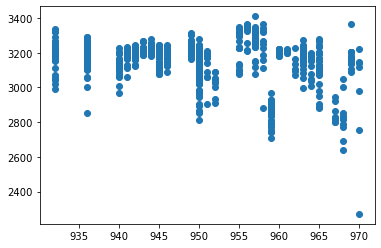

In [111]:
model1 = f.Model(data1, number_of_rows = 3)
model1.filter(sigma = 2)
plt.scatter(model1.df_all['id'],model1.df_all['temperatureAvg'])